## HYPOTHESIS TESTING.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset

insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
sns.set_palette('bright')
sns.set_style('darkgrid')

<Axes: xlabel='bmi', ylabel='charges'>

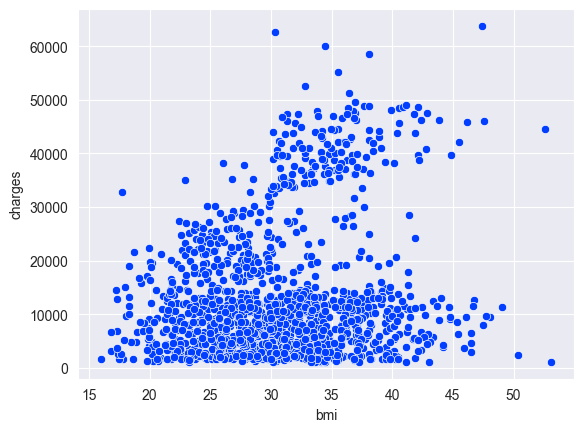

In [12]:
sns.scatterplot(data=insurance_df, x='bmi', y='charges')

In [8]:
# step 1: frame the problem statement.
# Is there a statistially significant relationship between BMI and charges.

# step 2: set the null and alternative hypothesis.
null = 'There is no significant relationship between BMI and charges'
alternative= 'There is a significant relationship between BMI and charges'

# step 3: choose the level of significance
alpha = 0.05

# step 4: compute the test.
correlation_coeff, pvalue = stats.spearmanr(insurance_df['bmi'], insurance_df['charges'])

# step 5: Decision rule
if pvalue < alpha:
    print(f'{alternative} @ pvalue of {round(pvalue,4)}')
else:
    print(f'{null} @ pvalue of {round(pvalue,4)}')


There is a significant relationship between BMI and charges @ pvalue of 0.0


#### ANALYSIS 2

In [16]:
chi_data = pd.crosstab(insurance_df['region'],insurance_df['smoker'])
stats.chi2_contingency(chi_data)

Chi2ContingencyResult(statistic=7.343477761407071, pvalue=0.06171954839170541, dof=3, expected_freq=array([[257.65022422,  66.34977578],
       [258.44544096,  66.55455904],
       [289.45889387,  74.54110613],
       [258.44544096,  66.55455904]]))

In [17]:
# step 1: frame the problem statement.
# Is there a statistially significant relationship between region and smoking habit

# step 2: set the null and alternative hypothesis.
null = 'There is no significant relationship between region and smoking habit'
alternative= 'There is a significant relationship between region and smoking habit'

# step 3: choose the level of significance
alpha = 0.05

# step 4: compute the test.
chi_data = pd.crosstab(insurance_df['region'],insurance_df['smoker'])
chi_stats, pvalue, dof, exp = stats.chi2_contingency(chi_data)

# step 5: Decision rule
if pvalue < alpha:
    print(f'{alternative} @ pvalue of {round(pvalue,4)}')
else:
    print(f'{null} @ pvalue of {round(pvalue,4)}')


There is no significant relationship between region and smoking habit @ pvalue of 0.0617


#### ANALYSIS 3

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


<Axes: xlabel='sex', ylabel='charges'>

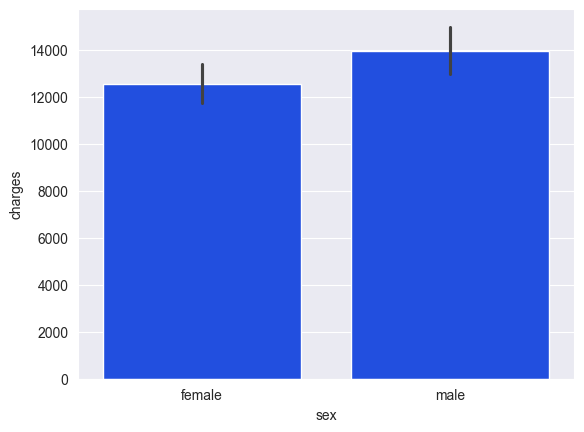

In [26]:
sns.barplot(data=insurance_df, x = 'sex', y = 'charges')

In [27]:
# step 1: frame the problem statement.
# Is there a statistially significant difference between charges and across gender

# step 2: set the null and alternative hypothesis.
null = 'There is no significant difeerence between charges across gender.'
alternative= 'There is a significant difeerence between charges across gender.'

# step 3: choose the level of significance
alpha = 0.05

# step 4: compute the test.
male_charges = insurance_df[insurance_df['sex'] == 'male']['charges'].values
female_charges = insurance_df[insurance_df['sex'] == 'female']['charges'].values

t_stats, pvalue = stats.ttest_ind(male_charges, female_charges)

# step 5: Decision rule
if pvalue < alpha:
    print(f'{alternative} @ pvalue of {round(pvalue,4)}')
else:
    print(f'{null} @ pvalue of {round(pvalue,4)}')

There is a significant difeerence between charges across gender. @ pvalue of 0.0361
